<a href="https://colab.research.google.com/github/FishyDanny/Road-Safety-Risk-Prediction/blob/main/02_baseline_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import joblib
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, confusion_matrix, roc_curve, roc_auc_score, make_scorer
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
!pip install scikit-optimize
from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
from google.colab import drive
import pickle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.4 MB/s eta 0:00:00


In [ ]:
drive.mount('/content/drive')

# Load data
X_train = joblib.load('/content/drive/MyDrive/ACTL3143_project/processed/X_train.pkl')
X_val = joblib.load('/content/drive/MyDrive/ACTL3143_project/processed/X_val.pkl')
y_train = joblib.load('/content/drive/MyDrive/ACTL3143_project/processed/y_train.pkl')
y_val = joblib.load('/content/drive/MyDrive/ACTL3143_project/processed/y_val.pkl')
X_test = joblib.load('/content/drive/MyDrive/ACTL3143_project/processed/X_test.pkl')
y_test = joblib.load('/content/drive/MyDrive/ACTL3143_project/processed/y_test.pkl')
preprocessor = joblib.load('/content/drive/MyDrive/ACTL3143_project/processed/preprocessor.pkl')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
keras.utils.set_random_seed(42)

In [ ]:
param_space = {
    'n_estimators': Integer(100, 500, name='n_estimators'),
    'max_depth': Integer(5, 50, name='max_depth'),
    'min_samples_split': Integer(2, 20, name='min_samples_split'),
    'min_samples_leaf': Integer(1, 10, name='min_samples_leaf'),
    'max_features': Categorical(['sqrt', 'log2', None], name='max_features'),
    'class_weight': Categorical(['balanced', None], name='class_weight'),
    'bootstrap': Categorical([True, False], name='bootstrap')
}

auc_scorer = make_scorer(roc_auc_score)

# Conduct hyperparameter tuning using Bayesian Optimisation
bayes_search = BayesSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    search_spaces=param_space,
    n_iter=50,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring=auc_scorer,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

bayes_search.fit(X_train, y_train)

best_params = bayes_search.best_params_
rf = bayes_search.best_estimator_

print("\nBest Parameters Found:")
print(best_params)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Best Parameters Found:
OrderedDict([('bootstrap', False), ('class_weight', 'balanced'), ('max_depth', 36), ('max_features', 'sqrt'), ('min_samples_leaf', 10), ('min_samples_split', 5), ('n_estimators', 223)])


Classification report:
              precision    recall  f1-score   support

      Single       0.78      0.70      0.73      6345
    Multiple       0.67      0.75      0.71      5124

    accuracy                           0.72     11469
   macro avg       0.72      0.72      0.72     11469
weighted avg       0.73      0.72      0.72     11469

F1 score: 0.7058499403067315
Confusion matrix:
[[4423 1922]
 [1281 3843]]
AUC-ROC: 0.7235421591804571


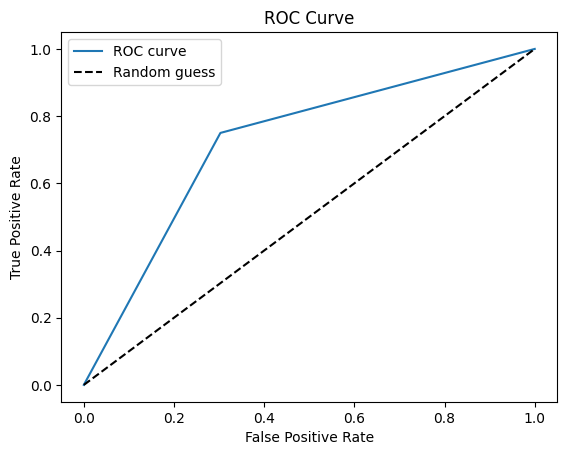

In [ ]:
# Evaluate
y_pred = rf.predict(X_test)
print("Classification report:")
print(classification_report(y_test, y_pred, target_names=['Single', 'Multiple']))
print("F1 score:", f1_score(y_test, y_pred))
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

# Make the ROC curve plot
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

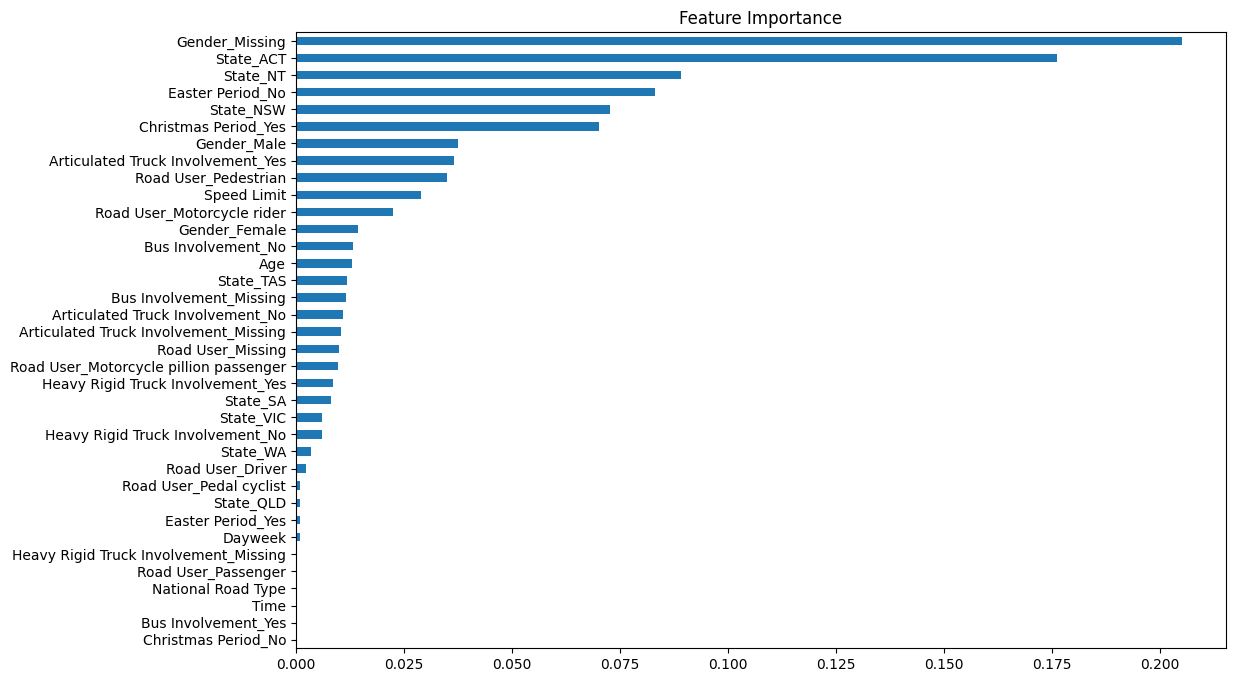

In [ ]:
# Feature importance
feature_names = (
    list(preprocessor.named_transformers_['onehot'].get_feature_names_out(['State', 'Road User', 'Gender', 'Bus Involvement', 'Heavy Rigid Truck Involvement', 'Articulated Truck Involvement', 'Christmas Period', 'Easter Period'])) +
    ['Dayweek', 'National Road Type'] +
    ['Time', 'Speed Limit', 'Age']
)

plt.figure(figsize=(12, 8))
pd.Series(rf.feature_importances_, index=feature_names).sort_values().plot.barh()
plt.title('Feature Importance')
plt.show()

In [ ]:
# Save to a pickle file
with open('final_baseline_rf_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

!cp *.pkl "/content/drive/MyDrive/ACTL3143_project/models/"